# Исследование надежности заемщиков

Заказчик — кредитный отдел банка. \
Входные данные от банка — статистика о платёжеспособности клиентов.

<b>Цель исследования:</b> \
Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<b>Ход исследования:</b>\
Данные надежности заемщиков получены из файла data.csv.

Исследование пройдёт в три этапа:

- Обзор данных
- Предобработка данных
- Исследовательский анализ

<b>Вопросы, на которые необходимо ответить:</b>
- Есть ли зависимость между количеством детей и возвратом кредита в срок?\
- Есть ли зависимость между семейным положением и возвратом кредита в срок?\
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?\
- Как разные цели кредита влияют на его возврат в срок?

## Обзор данных

In [1]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns    
import matplotlib.pyplot as plt

In [2]:
# прочитаем csv-файл и сохраним в новой переменной
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [3]:
# выведем первые 20 строк таблицы
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
# посмотрим основную информацию датафрема
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Данные содержат 12 столбцов и 21525 строк. Все данные типа object, float64  и int. 

<b>Описание столбцов:</b>\
children — количество детей в семье\
days_employed — общий трудовой стаж в днях\
dob_years — возраст клиента в годах\
education — уровень образования клиента\
education_id — идентификатор уровня образования\
family_status — семейное положение\
family_status_id — идентификатор семейного положения\
gender — пол клиента\
income_type — тип занятости\
debt — имел ли задолженность по возврату кредитов\
total_income — ежемесячный доход\
purpose — цель получения кредита

Поскольку некоторые столбцы имеют пропуски, а также есть отрицательные значения в столбце трудового стажа, то необходимо выполнить предобработку имеющихся данных.

## Предобработка данных

### Обработка аномальных значений

В данных встречаются артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом является отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально.

In [5]:
# заменим все отрицательные значения на положительные
data['days_employed'] = abs(data['days_employed'])

In [6]:
#  для каждого типа занятости выведем медианное значение трудового стажа days_employed в днях
data.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получаются аномально большие значения. Пока оставим их как есть, заменить их на данном этапе достаточно проблематично.

In [7]:
# выведем перечень уникальных значений столбца children
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце children есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма data.

In [8]:
# удалим аномальные значения
data = data.loc[(data['children'] != -1) & (data['children'] != 20)]

In [9]:
# проверим себя
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков

In [10]:
# выведем количество пропущенных значений для каждого столбца
data.isna().sum()

children               0
days_employed       2162
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2162
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения - days_employed и total_income.

Столбец total_income хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца income_type. 

In [11]:
#сделаем цикл с перебором по уникальным типам занятости
for i in data['income_type'].unique():
    med = data.loc[(data['income_type'] == i), 'total_income'].median()
    data.loc[(data['income_type'] == i) & (data['total_income'].isna()), 'total_income'] = \
    data['total_income'].fillna(med) 

Заполним пропуски в столбце days_employed медианными значениями по каждому типу занятости income_type.

In [12]:
for i in data['income_type'].unique():#цикл с перебором по уникальным типам занятости
    med2 = data.loc[(data['income_type'] == i), 'days_employed'].median()
    data.loc[(data['income_type'] == i) & (data['days_employed'].isna()), 'days_employed'] = \
    data['days_employed'].fillna(med2)

In [13]:
# проверим, что все пропуски были заменены
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [14]:
# заменим вещественный тип данных в столбце total_income на целочисленный
data['total_income'] = data['total_income'].astype('int')

### Обработка дубликатов

Обработаем неявные дубликаты в столбце education. \
Но для начала приведите их к нижнему регистру. В этом столбце есть значения, записанные по-разному с использованием заглавных и строчных букв. 

In [15]:
data['education'] = data['education'].str.lower()

In [16]:
# dыведtv на экран количество дубликатов в данных
data.duplicated().sum()

71

In [17]:
# удалим явные дубликаты
data.drop_duplicates()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля


### Категоризация данных

Создадим в датафрейме data столбец total_income_category с категориями:
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

In [18]:
# создадим функцию categorize_income()
def categorize_income(cat):
    if 0 <= cat <= 30000:
        return 'E'
    if 30001 <= cat <= 50000:
        return 'D'
    if 50001 <= cat <= 200000:
        return 'C'
    if 200001 <= cat <= 1000000:
        return 'B'
    if  cat >= 1000001:
        return 'A'

In [19]:
# применим функцию методом apply()
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [20]:
# выведем на экран перечень уникальных целей взятия кредита из столбца purpose
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [21]:
# создадим функцию categorize_purpose()
def categorize_purpose(p):
    if 'жил' in p or 'недвиж' in p:
        return 'операции с недвижимостью'
    elif 'автомобил' in p:
        return 'операции с автомобилем'
    elif 'свадьб' in p:
        return 'проведение свадьбы'
    elif 'образован' in p:
        return 'получение образования'

In [22]:
# применим функцию методом apply()
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

# выведем на экран получившийся дашборд
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем


<b>Вывод</b>\
В ходе предобработки данных были обнаружены аномалии в данных, пропуски в значениях (заменили на медианное значение), \
а также дубликаты — явные и неявные.
Дополнительно мы категоризировали данные, чтобы упростить работу с датафреймом.

## Исследовательский анализ

Задачей данного анализа является - ответить на некоторые вопросы. Разберем каждый вопрос по отдельности.

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
# группируем датафрейм по количеству детей и выводим с помощью метода agg() кол-во должников, всего кредиторов, 
# долю должников в зависимости от количества детей 
children_group = data.groupby('children')['debt'].agg(['sum', 'count', 'mean'])

# переименуем названия столбцов для более наглядного вывода таблицы
children_group = children_group.rename(columns={'sum': 'Кол-во должников', 'count': 'Всего кредиторов', 'mean': 'Доля должников'})

#вывод таблицы на экран
children_group

,Кол-во должников,Всего кредиторов,Доля должников
children,,,
0,1063,14149,0.075129
1,444,4818,0.092154
2,194,2055,0.094404
3,27,330,0.081818
4,4,41,0.097561
5,0,9,0.000000


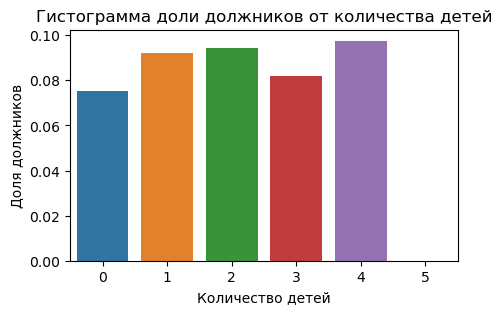

In [48]:
# построим гистограмму, отражающую зависимость доли должников от количества детей
plt.figure(figsize=(5, 3))
sns.barplot(data=children_group, x=children_group.index, y='Доля должников')
plt.xlabel('Количество детей')
plt.title('Гистограмма доли должников от количества детей')
plt.show();

**Вывод:** \
Из полученной таблицы прослеживается явная закономерность уменьшения количества должников при увеличении числа детей в семье.\
Максимальное количество должников - среди заемщиков без детей. 
Но пока это не говорит о том, что заемщики без детей наименее платежеспособны. 

Как можно увидеть по столбцу "Всего кредиторов"  - такая зависимость следствие того, что и кредитов заемщики без детей берут больше.\
Самым показательным является последний столбец с долей должников (отношение должников к общему числу кредиторов): здесь теряется прямая зависимость. Но все же наименьшая доля должников оказывается в семьях без детей - 7,5%;\
Если в семье 1 и 2 ребенка, то показатель увеличивается до 9,2 - 9,4%; \
Если в семье 3 ребенка, то доля должников снижается до 8%;\
В случае с 4 детьми ситация снова ухудшается, растет до 9,7% -  и это самая не платежеспособная категория граждан;\
В семьях с 5 детьми кредиты почти не берут, но те кто берет нет ни одного должника. Но 9 человек, которые взяли кредит, слишком малый показатель для статистических данных, поэтому здесь не стоит сильно опираться на эти изменения;\
Аналогично в семьях с 3 и 4 детьми достаточно мало наблюдений.

Резюмирую:
1. Чем больше детей в семье, тем меньше количество должников. Максимальное кол-во должников в семьях без детей.
2. Чем больше детей в семьей, тем меньше количество людей берут кредит. Чаще всего берут кредит семьи без детей.
3. В семьях без детей самый низкий показатель должников 
4. В семьях с 4 детьми - самая высокая доля должников
5. В семьях с 3 детьми доля должников снижается по сравнению с 1-2 ребенком.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [26]:
# группируем датафрейм по семейному положению и выводим с помощью метода agg() кол-во должников,
# всего кредиторов, долю должников в зависимости от его семейного положения 
married_group = data.groupby('family_status')['debt'].agg(['sum', 'count', 'mean'])

# переименуем названия столбцов для более наглядного вывода таблицы
married_group = married_group.rename(columns={'sum': 'Кол-во должников', 'count': 'Всего кредиторов', 'mean': 'Доля должников'})

# вывод таблицы на экран
married_group

,Кол-во должников,Всего кредиторов,Доля должников
family_status,,,
Не женат / не замужем,273,2799,0.097535
в разводе,84,1189,0.070648
вдовец / вдова,63,952,0.066176
гражданский брак,385,4160,0.092548
женат / замужем,927,12302,0.075354


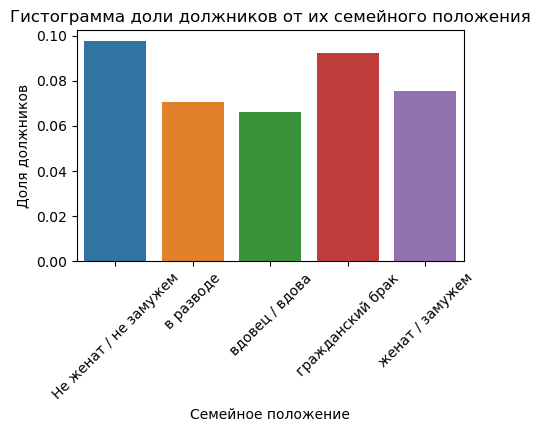

In [49]:
# построим гистограмму, отражающую зависимость доли должников от их семейного положения
plt.figure(figsize=(5, 3))
sns.barplot(data=married_group, x=married_group.index, y='Доля должников')
plt.xlabel('Семейное положение')
plt.xticks(rotation = 45)
plt.title('Гистограмма доли должников от их семейного положения')
plt.show();

**Вывод:** 
1. Кол-во должников у людей в разводе и у вдов\вдовцов - меньше всего. Но эта категория и кредитов берет меньше.
2. Среди женатых людей больше всего должников, и этот показатель даже в 3 раза больше, чем у неженатых.
3. Меньше всего кредитов берут одинокие люди - те кто овдовел (немногим больше люди в разводе).
4. Больше всего кредитов берут женатые люди. Женатые почти в 4,5 раза больше берут кредитов, чем неженатые.
5. Люди, которые не связали свою судьбу узами брака тяжелее всего отдают кредит, среди них наибольший процент должников: не женатые - 9,7%, в гражданском браке - 9,3%
6. Люди в разводе и вдовцы самые ответственные и среди них самый низкий процент должников - 7% и 6,6% соответственно
7. Женатые люди хоть и берут чаще всего кредиты, но и стараются их выплачивать - у них средний показатель по долгам (процент должников 7,5%)


### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [36]:
# сформировали сводную таблицу по категориям с доходами
income_svod = data.pivot_table(index='total_income_category', values='debt', aggfunc=['sum', 'count', 'mean'])

# переименовали названия столбцов для наглядности
income_svod = income_svod.rename(columns={'sum': 'Кол-во должников', 'count': 'Всего кредиторов', 'mean': 'Доля должников'})

# вывод таблицы на экран
income_svod

,Кол-во должников,Всего кредиторов,Доля должников
,debt,debt,debt
total_income_category,,,
A,2,25,0.080000
B,354,5014,0.070602
C,1353,15992,0.084605
D,21,349,0.060172
E,2,22,0.090909


**Вывод:** \
    Зависимости кол-во должников и общее кол-во заемщиков от дохода близки между собой и схожи с нормальным распределением.
По этим данным видно, что в сегментах А и Е меньше всего людей и они примерно равны между собой.
Максимальное кол-во людей и среди должников и заемщиков - со средним доходом С (50001 - 200000).
Теперь посмотрим на последний столбец с долей должников, и здесь видим интересную волнообразную зависимость: 
наименьший процент должников в категории D - 6%, Также довольно хорошо выплачивают свои кредиты люди с доходом из категории B (7%).\
Наибольший процент должников, как и предполагалось, у категории с минимальным уровнем дохода E (до 30 000) и составляет 9%.
И не так хорошо справляются со своими кредитами сегмент С со средним заработком (чаще всего берут кредит) - процент должников 8,4%

### Как разные цели кредита влияют на его возврат в срок?

In [37]:
# сформировали сводную таблицу по категориям в зависимости от цели кредитования
purpose_svod = data.pivot_table(index='purpose_category', values='debt', aggfunc=['sum', 'count', 'mean'])

# переименовали названия столбцов для наглядности
purpose_svod = purpose_svod.rename(columns={'sum': 'Кол-во должников', 'count': 'Всего кредиторов', 'mean': 'Доля должников'})

# вывод таблицы на экран
purpose_svod

,Кол-во должников,Всего кредиторов,Доля должников
,debt,debt,debt
purpose_category,,,
операции с автомобилем,400,4288,0.093284
операции с недвижимостью,780,10780,0.072356
получение образования,369,3997,0.092319
проведение свадьбы,183,2337,0.078306


**Вывод:** 
1. Больше всего берут кредит на недвижимость, кол-во должников так же превалирует в этой категории.
2. Реже всего будет кредит на свадьбу
3. Катерогия кредита на автомобиль и на образования - примерно одинаковые значения. Это касается как числа общих заемщиков, так и кол-ва и доли должников.
4. Несмотря на то, что кредиты на авто и образов берут не так часто, но тем не менее у этих 2 категорий самый высокий процент должников! - 9,3%
5. Среди заемщиков на недвижимость - доля должников на удивление самый низкий показатель и составляет всего 7,2%

### Приведите возможные причины появления пропусков в исходных данных

*Ответ:* Пропуски данных в датафрейме присутствуют только в 2 столбцах - days_employed (стаж) и total_income (доход). Также судя по тому, что количество пропусков одинаково для этих 2 столбцов, то можно сделать вывод, что отсутствуют значения в одних и тех же строках, т.е. они не случайные. И поскольку это стаж и доход, то можно предположить, что отсутствующие значения зависят от типа занятости заемщика. Как можно заметить по первым 20 строкам, то там есть в 1 строке пропуск и он подтверждает нашу гипотезу. Тип занятости которого - пенсионер. Также вероятно, что для некоторых кредитов (тип кредита или сумма кредита) поля со стажем работы и с доходом были не обязательны, поэтому некоторые заемщики их не указывали. и им одобряли кредит из без подтверждения этих сведений.

### Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных

*Ответ:* 
Оба столбца с пропусками - количественные переменные. Такие пропуски заполняют характерными значениями, т.е. значениями схожими с остальными значениями из всего датафрейма для того, чтобы можно было провести дальнейший анализ.
Далее выбор стоит - посчитать среднее арифметическое или медиану. 
Медиана в данном случае выбор лучше, поскольку значение медианы нивелирует аномальные значения, которые могли бы испортить конечный результат.

## Общий вывод

Итак, из исходного датафрейма мы убрали все пропуски значений, проанализировали надежность заемщиков по 4 критериям. 

Но также хочется отметить, то в ходе аннализа была выявлена часть данных, которая не пригодна для интерпретации. Это сложилось  ввиду недостаточности их количества для статистического анализа ( их количество не достигает 50).

Но не смотря это все удалось выявить закономерности на более часто встречающихся данных:

1. Наиболее надежные люди в качестве заумщиков - без детей
2. Чем больше детей в семьей, тем меньше количество людей берут кредит. Чаще всего берут кредит семьи без детей.
2. Одинокие люди, которые уже вступали в брак самые надежные (люди в разводе 7% или вдовы\вдовцы 6,6%), семейные люди чуть хуже отдают кредиты, но в целом показатель неплохой
3. Среди женатых людей больше всего должников, и этот показатель даже в 3 раза больше, чем у неженатых.
4. Люди, не вступавшие в брак плохо отдают кредиты (гражданский брак, не женатые)
5. Женатые люди хоть и берут чаще всего кредиты, но и стараются их выплачивать - у них средний показатель по долгам (процент должников 7,5%)
6. Заемщики с небольшим доходом 30 000 - 50 000 лучше всего выплачивают кредиты, процент должников всего 6%
7. Чаще всего берут кредиты люди из категории С с доходом (50001 - 200000), но у них и доля должников выше и составляет 8,4%. 
8. Кредит на недвижимость берут чаще всего, ана свадьбу крайне редко
9. Операции с недвижимостью - самый надежный вариант по оплатам кредита без долгов, кредиты на авто и образование возвращают не так охотно
10. Кредиты на авто и образов берут не так часто, но тем не менее у этих 2 категорий самый высокий процент должников - 9,3%
11. Доля должников по всем 4 вариантам составляет не более 10% от общего числа заемщиков.